In [1]:
#Load packages
from netCDF4 import Dataset
import numpy as np
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import sys
import netCDF4 as nc4
from torch import nn
from torch import optim
import progressbar
import pytorch_lightning as pl
import torch.nn.functional as F

sys.path.append("/home2/datahome/tpicard/python/Python_Modules_p3_pyticles/")

import torch
from torch.utils.data import DataLoader, Dataset

def read_input():
    nc_name = 'Inputs_vertical_levels.nc'
    nc = nc4.Dataset('/home2/datawork/tpicard/Pyticles/CNN_DATA/{0}'.format(nc_name),'r')
    inputs_test = np.asfortranarray(nc.variables['inputs_test'])
    inputs_train = np.asfortranarray(nc.variables['inputs_train'])
    nc.close()
    return(inputs_test,inputs_train)

def read_output():
    nc_name = 'pdf_vertical_levels.nc'
    nc = nc4.Dataset('/home2/datawork/tpicard/Pyticles/OUTPUTS/PDF/{0}'.format(nc_name),'r')
    pdf_test = np.asfortranarray(nc.variables['pdf_test'])*((80/5)**2)
    pdf_train = np.asfortranarray(nc.variables['pdf_train'])*((80/5)**2)
    nc.close()
    return(pdf_test,pdf_train)

class Pdf_Image_DataSet(Dataset):
    def __init__(self,images, pdf,transform=None):
        
        self.pdf = pdf
        self.images = images
        self.transform = transform

    def __len__(self):
        return self.pdf.shape[0]

    def __getitem__(self, idx):
        # select coordinates
        pdf_sample = self.pdf[idx,:,:,:,:]
        image_sample = self.images[idx,:,:,:]
        
        if self.transform:
            pdf_sample = self.transform(pdf_sample)
            image_sample = self.transform(image_sample)
            
        return image_sample, pdf_sample

class ToTensor(object):
    """Convert ndarrays in sample to Tensors."""
    def __call__(self, sample):
        return torch.FloatTensor(sample)

from torch import nn
from torch import optim
import progressbar

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

# hyperparameters
batch_size = 30


(pdf_test,pdf_train) = read_output()
(inputs_test,inputs_train) = read_input()

## reduce size dataset
train_set = Pdf_Image_DataSet(inputs_train,pdf_train,transform= ToTensor())
train_loader = DataLoader(train_set, batch_size=batch_size, num_workers = 0, shuffle = True, drop_last=False)

test_set = Pdf_Image_DataSet(inputs_test,pdf_test,transform= ToTensor())
test_loader = DataLoader(test_set, batch_size=batch_size, num_workers = 0, shuffle = True, drop_last=False)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
'''
def bhatta_loss(output,target):
    epsilone = 1e-30
    out = torch.sum(1 - torch.sum(torch.sqrt(torch.abs((torch.mul(output, target)+epsilone))),axis=(2,3)))
    return out
'''


cuda


In [194]:
def bhatta_loss(Y_hat,Y):

    max_bhatta = 0
    min_bhatta = 1
    i =0
    bhatta_cnnV2_bias_false = np.zeros((9,500))
    with torch.no_grad():
        for z in range(0,9):
            loss_prediction_test = 1 - torch.sum(torch.sqrt(torch.abs((torch.mul(Y_hat[:,z,:,:,:], Y[:,z,:,:,:])))),axis=(2,3))
            if i ==0:
                bhatta_list = loss_prediction_test
                i=i+1
            else :
                bhatta_list = torch.cat((bhatta_list,loss_prediction_test),0)

    return torch.mean(bhatta_list)

In [201]:
# Achitecture of the model 

class cnn_V2_1(pl.LightningModule):
    def __init__(self):
        super().__init__()
        
        self.cnn0 = nn.Sequential(    
            
            nn.Conv2d(1, 2, kernel_size=3, padding=1, bias=False),
            
    )
            
        self.cnn1 = nn.Sequential(    
            
            nn.Conv2d(52, 26, kernel_size = 3, padding = 1, bias=False),
            nn.ReLU(True),
            nn.AvgPool2d(2),
            nn.Conv2d(26, 10, kernel_size = 3, padding = 1, bias=False),
            nn.ReLU(True),
            nn.Conv2d(10, 2, kernel_size = 3, padding = 1, bias=False),
    )
        self.cnn2 = nn.Sequential(    
            
            nn.Conv2d(52, 26, kernel_size = 3, padding = 1, bias=False),
            nn.ReLU(True),
            nn.AvgPool2d(2),
            nn.Conv2d(26, 10, kernel_size = 3, padding = 1, bias=False),
            nn.ReLU(True),
            nn.Conv2d(10, 2, kernel_size = 3, padding = 1, bias=False),
    )
        self.cnn3 = nn.Sequential(    
            
            nn.Conv2d(52, 26, kernel_size = 3, padding = 1, bias=False),
            nn.ReLU(True),
            nn.AvgPool2d(2),
            nn.Conv2d(26, 10, kernel_size = 3, padding = 1, bias=False),
            nn.ReLU(True),
            nn.Conv2d(10, 2, kernel_size = 3, padding = 1, bias=False),
    )
        self.cnn4 = nn.Sequential(    
            
            nn.Conv2d(52, 26, kernel_size = 3, padding = 1, bias=False),
            nn.ReLU(True),
            nn.AvgPool2d(2),
            nn.Conv2d(26, 10, kernel_size = 3, padding = 1, bias=False),
            nn.ReLU(True),
            nn.Conv2d(10, 2, kernel_size = 3, padding = 1, bias=False),
    )
        self.cnn5 = nn.Sequential(    
            
            nn.Conv2d(52, 26, kernel_size = 3, padding = 1, bias=False),
            nn.ReLU(True),
            nn.AvgPool2d(2),
            nn.Conv2d(26, 10, kernel_size = 3, padding = 1, bias=False),
            nn.ReLU(True),
            nn.Conv2d(10, 2, kernel_size = 3, padding = 1, bias=False),
    )
        self.cnn6 = nn.Sequential(    
            
            nn.Conv2d(52, 26, kernel_size = 3, padding = 1, bias=False),
            nn.ReLU(True),
            nn.AvgPool2d(2),
            nn.Conv2d(26, 10, kernel_size = 3, padding = 1, bias=False),
            nn.ReLU(True),
            nn.Conv2d(10, 2, kernel_size = 3, padding = 1, bias=False),
    )
        self.cnn7 = nn.Sequential(    
            
            nn.Conv2d(52, 26, kernel_size = 3, padding = 1, bias=False),
            nn.ReLU(True),
            nn.AvgPool2d(2),
            nn.Conv2d(26, 10, kernel_size = 3, padding = 1, bias=False),
            nn.ReLU(True),
            nn.Conv2d(10, 2, kernel_size = 3, padding = 1, bias=False),
    )
        self.cnn8 = nn.Sequential(    
            
            nn.Conv2d(52, 26, kernel_size = 3, padding = 1, bias=False),
            nn.ReLU(True),
            nn.AvgPool2d(2),
            nn.Conv2d(26, 10, kernel_size = 3, padding = 1, bias=False),
            nn.ReLU(True),
            nn.Conv2d(10, 2, kernel_size = 3, padding = 1, bias=False),
    )
        self.cnn9 = nn.Sequential(    
            
            nn.Conv2d(52, 26, kernel_size = 3, padding = 1, bias=False),
            nn.ReLU(True),
            nn.AvgPool2d(2),
            nn.Conv2d(26, 10, kernel_size = 3, padding = 1, bias=False),
            nn.ReLU(True),
            nn.Conv2d(10, 2, kernel_size = 3, padding = 1, bias=False),
    )
        
        

        self.softmax = nn.Softmax(dim=1)
        self.flatten = nn.Flatten(start_dim=1, end_dim=- 1)
        self.maxpool2d = nn.MaxPool2d(2)
        self.avgpool2d = nn.AvgPool2d(2)
        self.conv2d = nn.Conv2d(2, 1, kernel_size = 1, padding = 0, bias=False)
        self.relu = nn.ReLU(True)
        
    def forward(self, z, y):
        
        y_hat = torch.clone(y)
        functions = [self.cnn1,self.cnn2,self.cnn3,self.cnn4,self.cnn5,self.cnn6,self.cnn7,self.cnn8,self.cnn9]
        i = 5
        y_hat_j = y[:,i-1,:,:,:]
        for j in range(1,9,1):

            y_grad = self.cnn0(y_hat_j)
            z_i = functions[j](z)
            out = torch.mul(z_i,y_grad)
            #out = out.view(out.shape[0],2,50,50)
            out = self.conv2d(out)
            out1 = self.flatten(out)
            y_before = self.flatten(y_hat_j)
            out =  y_before + out1
            out = self.relu(out)
            out = self.softmax(torch.log(out))
            #out = torch.div(torch.abs(out),torch.sum(torch.abs(out)))
            y_hat_j = out.view(out.shape[0],1,50,50)
            
        y_hat[:,i,:,:,:] = y_hat_j
            
        return y_hat
    
    def configure_optimizers(self):
        lr = 0.001
        optimizer = optim.Adam(self.parameters(),lr= lr, betas=(0.5, 0.999),weight_decay=0)
        return optimizer
    
    def training_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x,y)
        y_baseline = torch.clone(y)
        y_baseline[:,5,:,:,:] = y[:,4,:,:,:]
        loss = 10e6*F.mse_loss(y_hat, y)
        Bhatta_loss = bhatta_loss(y_hat, y)
        Bhatta_baseline = bhatta_loss(y_baseline, y)
        Baseline = 10e6*F.mse_loss(y_baseline, y)
        self.log("my_loss", loss, on_step=True, on_epoch=True)
        self.log("Bhatta_loss", Bhatta_loss, on_step=True, on_epoch=True)
        self.log("Baseline", Baseline, on_step=True, on_epoch=True)
        self.log("Bhatta_baseline", Bhatta_baseline, on_step=True, on_epoch=True)
        return loss
    
    def validation_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x,y)
        y_baseline = torch.clone(y)
        y_baseline[:,5,:,:,:] = y[:,4,:,:,:]
        loss = 10e6*F.mse_loss(y_hat, y)
        Bhatta_loss = bhatta_loss(y_hat, y)
        Bhatta_baseline = bhatta_loss(y_baseline, y)
        Baseline = 10e6*F.mse_loss(y_baseline, y)
        self.log("my_loss_test", loss, on_step=True, on_epoch=True)
        self.log("Bhatta_loss_test", Bhatta_loss, on_step=True, on_epoch=True)
        self.log("Baseline_test", Baseline, on_step=True, on_epoch=True)
        self.log("Bhatta_baseline_test", Bhatta_baseline, on_step=True, on_epoch=True)
        return loss
    
    def test_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x,y)
        #loss = bhatta_loss(y_hat, y)
        loss = 10e6*F.mse_loss(y_hat, y)
        #self.log('test_loss', loss)
        return loss

In [202]:
from pytorch_lightning.callbacks import ModelCheckpoint
# init model
autoencoder = cnn_V2_1()

checkpoint_callback = ModelCheckpoint(dirpath='lightning_logs/CNN_V2_9j/')
trainer = pl.Trainer(max_epochs=20,gpus=1,default_root_dir='lightning_logs/CNN_V2_9j',callbacks=[checkpoint_callback]) #(if you have GPUs)
#trainer = pl.Trainer()
trainer.fit(model=autoencoder, train_dataloaders=train_loader,val_dataloaders=test_loader)


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [GPU-739dfd1b-f418-cc5b-11cf-7fb8737907b5]
Missing logger folder: lightning_logs/CNN_V2_9j/lightning_logs

   | Name      | Type       | Params
------------------------------------------
0  | cnn0      | Sequential | 18    
1  | cnn1      | Sequential | 14.7 K
2  | cnn2      | Sequential | 14.7 K
3  | cnn3      | Sequential | 14.7 K
4  | cnn4      | Sequential | 14.7 K
5  | cnn5      | Sequential | 14.7 K
6  | cnn6      | Sequential | 14.7 K
7  | cnn7      | Sequential | 14.7 K
8  | cnn8      | Sequential | 14.7 K
9  | cnn9      | Sequential | 14.7 K
10 | softmax   | Softmax    | 0     
11 | flatten   | Flatten    | 0     
12 | maxpool2d | MaxPool2d  | 0     
13 | avgpool2d | AvgPool2d  | 0     
14 | conv2d    | Conv2d     | 2     
15 | relu      | ReLU       | 0     
------------------------------------------
132 K     Trainable params
0   

Epoch 0:  91%|█████████ | 164/181 [00:13<00:01, 12.11it/s, loss=24.5, v_num=0]
Validating: 0it [00:00, ?it/s]
Epoch 1:  91%|█████████ | 164/181 [00:13<00:01, 12.17it/s, loss=23.4, v_num=0]
Validating: 0it [00:00, ?it/s]
Epoch 2:  91%|█████████ | 164/181 [00:13<00:01, 12.17it/s, loss=25.6, v_num=0]
Validating: 0it [00:00, ?it/s]
Epoch 3:  91%|█████████ | 164/181 [00:13<00:01, 12.13it/s, loss=22.6, v_num=0]
Validating: 0it [00:00, ?it/s]
Epoch 4:  91%|█████████ | 164/181 [00:13<00:01, 12.15it/s, loss=25, v_num=0]  
Validating: 0it [00:00, ?it/s]
Epoch 5:  91%|█████████ | 164/181 [00:13<00:01, 12.21it/s, loss=23.4, v_num=0]
Validating: 0it [00:00, ?it/s]
Epoch 6:  91%|█████████ | 164/181 [00:13<00:01, 12.18it/s, loss=24.2, v_num=0]
Validating: 0it [00:00, ?it/s]
Epoch 7:  91%|█████████ | 164/181 [00:13<00:01, 12.19it/s, loss=21.4, v_num=0]
Validating: 0it [00:00, ?it/s]
Epoch 8:  91%|█████████ | 164/181 [00:13<00:01, 12.17it/s, loss=24.3, v_num=0]
Validating: 0it [00:00, ?it/s]
Epoch 9:  

# Visual test on the last prediction

In [183]:
checkpoint_callback.best_model_path

'/home2/datahome/tpicard/PhD_MOMOPAR/Comparison/lightning_logs/CNN_V2_5j/epoch=16-step=2787.ckpt'

<ipython-input-184-b2ece1429dcc>:33: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(lon, lat,pred[n_sample,0,:,:].cpu().detach().numpy(), cmap=cmap,alpha = 0.8)
<ipython-input-184-b2ece1429dcc>:52: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(lon, lat ,y[n_sample,dz,0,:,:].cpu().detach().numpy(), cmap=cmap,alpha = 0.8)


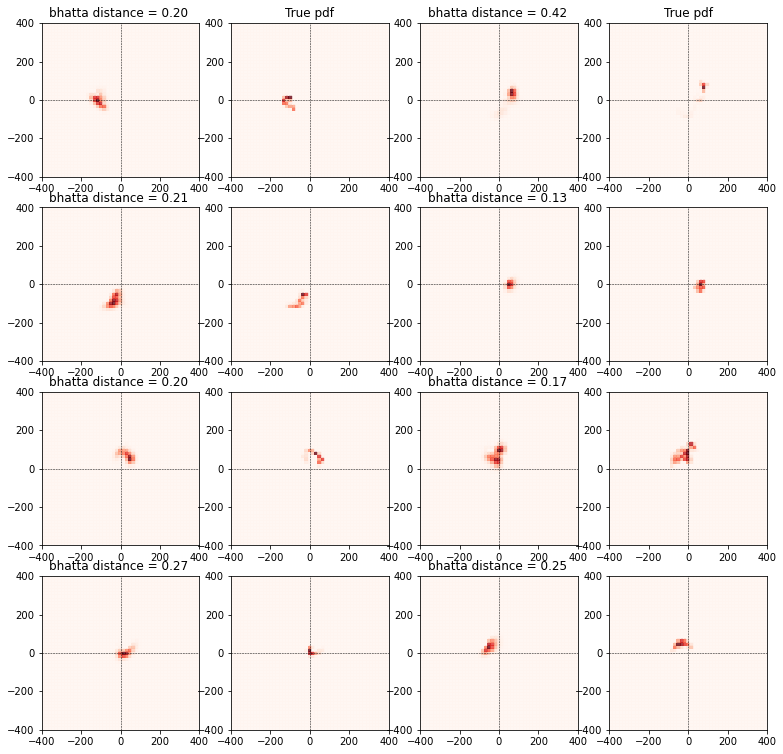

In [184]:
dz = 5

with torch.no_grad():
    for batch, (X, y ) in enumerate(test_loader):
        X, y  = X.to(device), y.to(device)
        autoencoder = autoencoder.to(device)
        pred = autoencoder(X,y)[:,dz,:,:,:]

        
xband, yband = np.linspace(-400,400,51), np.linspace(-400,400,51)

fig = plt.figure(figsize=(13,13))

#n_sample = 3
i = 0
#levels=np.logspace(-4, -1, 10)
cmap = 'Spectral_r' 
cmap = 'Reds'
cmap_blue = 'Blues' 
norm= colors.LogNorm(vmin=1e-4, vmax=1e-1)
lon = np.linspace(-400,400,50)
lat = np.linspace(-400,400,50)

for n_sample in range(0,8,1):
    
    ax = fig.add_subplot(4,4,i*2+1)
    levels=np.linspace(0,np.max(pred[n_sample,0,:,:].cpu().detach().numpy()), 10)
    levels=np.linspace(0,np.max(y[n_sample,dz,0,:,:].cpu().detach().numpy()), 10)
    #cb.ax.tick_params(labelsize='large')
    ax.set_xlim([-400,400])
    ax.set_ylim([-400,400])

    plt.pcolormesh(lon, lat,pred[n_sample,0,:,:].cpu().detach().numpy(), cmap=cmap,alpha = 0.8)
    plt.axvline(x=0,color='black',linestyle='--',linewidth=0.5)
    plt.axhline(y=0,color='black',linestyle='--',linewidth=0.5)
    loss_prediction = 1 - torch.sum(torch.sqrt(torch.abs((torch.mul(pred[n_sample,0,:,:], y[n_sample,dz,0,:,:])))))
    loss_prediction = np.round(loss_prediction.cpu().detach().numpy(),3)
    '''
    plt.pcolormesh(lon,lat,pred[n_sample,0,:,:].cpu().detach().numpy(),cmap = plt.cm.Reds,alpha = 1)
    #plt.pcolormesh(lon,lat,y[n_sample,0,:,:].cpu().detach().numpy(),cmap = plt.cm.Blues,alpha = 0.5)
    '''
    #if i == 3 : plt.xlabel('km', fontsize=12)
    #plt.ylabel('km', fontsize=12)
    plt.title('bhatta distance = {:.2f} '.format(loss_prediction))
    #cb = plt.colorbar()
    #cb.set_ticks([1e-3, 1e-2])
    
    ax = fig.add_subplot(4,4,i*2+2)
    ax.set_xlim([-400,400])
    ax.set_ylim([-400,400])
    
    plt.pcolormesh(lon, lat ,y[n_sample,dz,0,:,:].cpu().detach().numpy(), cmap=cmap,alpha = 0.8)
    plt.axvline(x=0,color='black',linestyle='--',linewidth=0.5)
    plt.axhline(y=0,color='black',linestyle='--',linewidth=0.5)
    '''
    plt.pcolormesh(lon,lat,y[n_sample,0,:,:].cpu().detach().numpy(),cmap = plt.cm.Reds)
    '''
    #if i == 3 : plt.xlabel('km', fontsize=12)
    #plt.ylabel('km', fontsize=12)
    if i ==0 : plt.title('True pdf')
    if i ==1 : plt.title('True pdf')
    #cb = plt.colorbar()
    #cb.set_ticks([1e-3, 1e-2])
    
    i = i+1
#plt.savefig('prediction_200m.png')

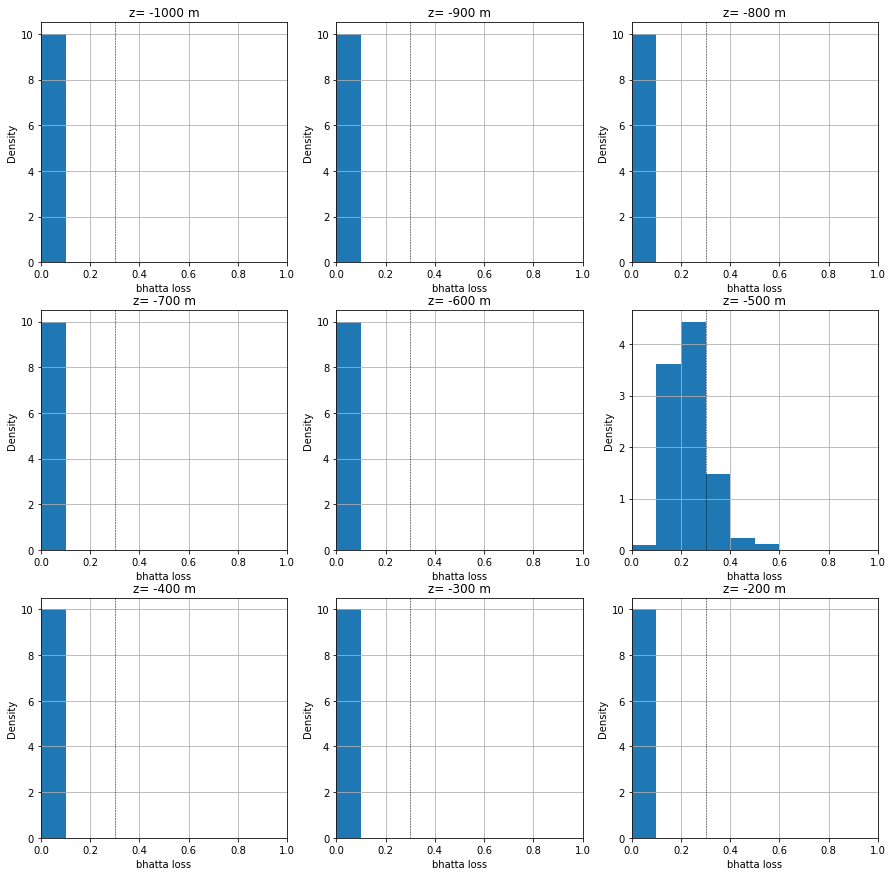

In [185]:
bhatta_cnnV2_bias_false = loss_distribution(test_loader,autoencoder.to(device))
#plt.savefig('distri_par_couche_sans_softmax.png')

In [134]:
def loss_distribution(test_loader,model):

    max_bhatta = 0
    min_bhatta = 1
    list_level = [1000,900,800,700,600,500,400,300,200]
    fig = plt.figure(figsize=(15,15))
    i =0
    bhatta_cnnV2_bias_false = np.zeros((9,500))
    with torch.no_grad():
        for z in range(0,9):
            i = 0
            for batch, (X, y) in enumerate(test_loader):

                # TRAIN MODEL
                X, y = X.to(device), y.to(device)
                prediction_test = model(X,y)
                loss_prediction_test = 1 - torch.sum(torch.sqrt(torch.abs((torch.mul(prediction_test[:,z,:,:,:], y[:,z,:,:,:])))),axis=(2,3))
                if i ==0:
                    bhatta_list = loss_prediction_test
                    i=i+1
                else :
                    bhatta_list = torch.cat((bhatta_list,loss_prediction_test),0)
                    
            ax = fig.add_subplot(3,3,z+1)
            bin = np.linspace(0,1,11)
            plt.hist(bhatta_list.cpu().detach().numpy(), bins=bin, density=True)
            plt.title('z= {0} m'.format(-list_level[z]), fontsize=12)
            plt.xlabel('bhatta loss')
            plt.ylabel('Density')
            plt.grid()
            plt.axvline(x=0.3,color='black',linestyle='--',linewidth=0.5)
            plt.xlim(0,1)
            bhatta_cnnV2_bias_false[z] = bhatta_list.cpu().detach().numpy()[:,0]
            #plt.ylim(0,10)

    
    return bhatta_cnnV2_bias_false

In [69]:
plt.ylim(top=3)

AttributeError: module 'matplotlib.pyplot' has no attribute 'ylim'

In [138]:
n_sample = 4
np.sum(pred[n_sample,0,:,:].cpu().detach().numpy())

1.0

<ipython-input-151-fc5615512a82>:25: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ctf = ax.pcolormesh(lon, lat,prediction_test[i_sample,n,0,:,:].cpu().detach().numpy(),vmin = 0, vmax = np.max(y[i_sample,n,0,:,:].cpu().detach().numpy()), cmap=cmap,alpha = 0.8)
<ipython-input-151-fc5615512a82>:44: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ctf = ax.pcolormesh(lon, lat,y[i_sample,n,0,:,:].cpu().detach().numpy(),vmin = 0, vmax = np.max(y[i_sample,n,0,:,:].cp

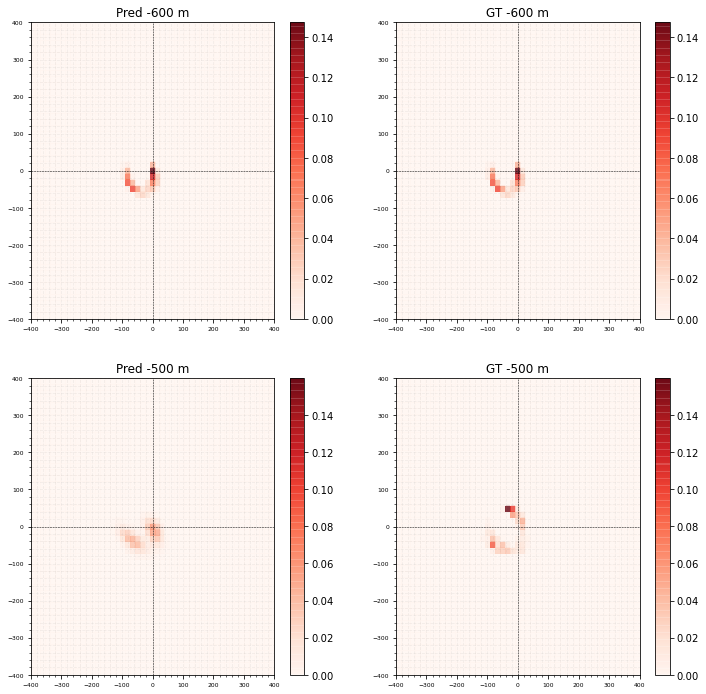

In [151]:
%matplotlib inline
with torch.no_grad():
    for batch, (X, y) in enumerate(test_loader):

        # TRAIN MODEL
        X, y = X.to(device), y.to(device)
        autoencoder = autoencoder.to(device)
        prediction_test = autoencoder(X,y)
        
list_level = [1000,900,800,700,600,500,400,300,200]
fig = plt.figure(figsize=(12,12))

i_sample = 5

for n in range(4,6):
    

    ax = fig.add_subplot(2,2,2*(n-3)-1)
    cmap = 'Spectral_r'
    cmap = 'Reds'
    xband, yband = np.linspace(-800,800,51), np.linspace(-800,800,51)
    jpdf = prediction_test[i_sample,n,0,:,:].cpu().detach().numpy()
    #norm= colors.LogNorm(vmin=1e-4, vmax=1e-1)
    #ctf = ax.contourf(0.5*(xband[:-1]+xband[1:]), 0.5*(yband[:-1]+yband[1:]), jpdf,  levels, norm=norm, cmap=cmap, extend='both')
    ctf = ax.pcolormesh(lon, lat,prediction_test[i_sample,n,0,:,:].cpu().detach().numpy(),vmin = 0, vmax = np.max(y[i_sample,n,0,:,:].cpu().detach().numpy()), cmap=cmap,alpha = 0.8)
    #cb = fig.colorbar(ctf, ax=ax)
    #cb.set_ticks([1e-5, 1e-4])
    #cb.set_label('[km' + r'$^{-2}$' + ']', fontsize=16, rotation=270)
    ax.set_xlim([-400,400])
    ax.set_ylim([-400,400])
    plt.grid(b=True, which='major', color='gray', linestyle='--',alpha=0.1)
    plt.grid(b=True, which='minor', color='gray', linestyle='--',alpha=0.1)
    plt.axvline(x=0,color='black',linestyle='--',linewidth=0.5)
    plt.axhline(y=0,color='black',linestyle='--',linewidth=0.5)
    plt.tick_params(labelsize=6)
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    plt.title('Pred {0} m'.format(-list_level[n]), fontsize=12)
    plt.colorbar(ctf)
    levels=np.linspace(0, np.max(y[i_sample,n,0,:,:].cpu().detach().numpy()), 10)
    
    ax = fig.add_subplot(2,2,(n-3)*2)
    jpdf = y[i_sample,n,0,:,:].cpu().detach().numpy()
    ctf = ax.pcolormesh(lon, lat,y[i_sample,n,0,:,:].cpu().detach().numpy(),vmin = 0, vmax = np.max(y[i_sample,n,0,:,:].cpu().detach().numpy()), cmap=cmap,alpha = 0.8)
    #cb = fig.colorbar(ctf, ax=ax)
    #cb.set_ticks([1e-5, 1e-4])
    #cb.set_label('[km' + r'$^{-2}$' + ']', fontsize=16, rotation=270)
    ax.set_xlim([-400,400])
    ax.set_ylim([-400,400])

    plt.axvline(x=0,color='black',linestyle='--',linewidth=0.5)
    plt.axhline(y=0,color='black',linestyle='--',linewidth=0.5)
    plt.tick_params(labelsize=6)
    plt.grid(b=True, which='major', color='gray', linestyle='--',alpha=0.1)
    plt.grid(b=True, which='minor', color='gray', linestyle='--',alpha=0.1)
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    plt.title('GT {0} m'.format(-list_level[n]), fontsize=12)
    plt.colorbar(ctf)

In [100]:
autoencoder = cnn_parallele().to(device)
with torch.no_grad():
    for batch, (X, y ) in enumerate(test_loader):
        X, y  = X.to(device), y.to(device)
prediction_test = autoencoder(X,y).cpu().detach().numpy()

In [78]:
prediction_test.shape

(20, 9, 1, 50, 50)

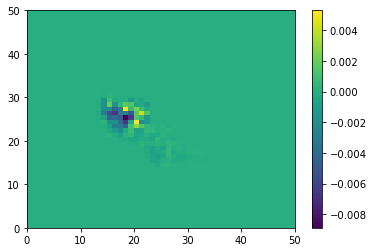

In [54]:
plt.pcolormesh(prediction_test[0,0,:,:])
plt.colorbar()

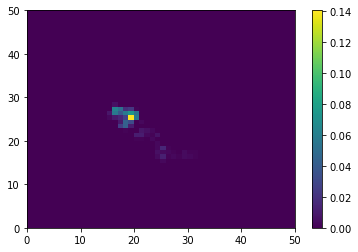

In [55]:
plt.pcolormesh(y[0,4,0,:,:].cpu().detach().numpy())
plt.colorbar()


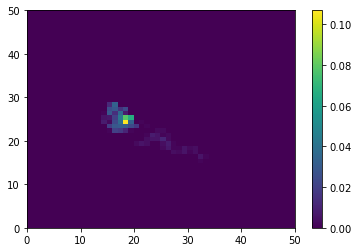

In [56]:
plt.pcolormesh(y[0,5,0,:,:].cpu().detach().numpy())
plt.colorbar()